# Importing the different modules

In [1]:
from sklearn.datasets import make_blobs, make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Importing the created package

In [10]:
from nn.initializer import HeInitializer, XavierInitializer, RandomInitializer, ZeroInitializer
from nn.network import BinaryClassifier
from nn.activation import Relu, Sigmoid, Linear
from nn.losses import BinaryCrossEntropy
from nn.updater import AdamUpdater, MomentumUpdater, RMSPropUpdater, GradientUpdater

# Binary classification

Generating Dataset
Data shape : X:(1000, 2), y:(1000, 1)


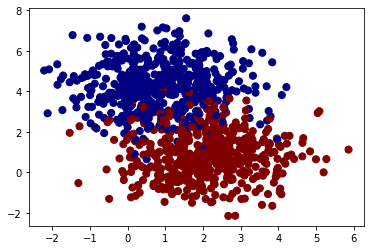

In [23]:
print("Generating Dataset")

X, y = make_blobs(n_samples=1000, centers=2, \
                  random_state=0, cluster_std=1.2)
y = y.reshape((y.shape[0],1))

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.2, random_state=1)

print(f"Data shape : X:{X.shape}, y:{y.shape}")

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plt.show()

# Definition of the model using the created package

In [14]:
#Creation of the network
def build_model(initializer=XavierInitializer, updater=GradientUpdater):
    nn = BinaryClassifier(input_shape=2, initializer=initializer)

    #Adding layers to the model
    nn.add_layer(5, activation=Relu)
    nn.add_layer(3, activation=Relu)
    nn.add_layer(1, activation=Sigmoid)

    #defining optimization parameters
    nn.define_loss(loss=BinaryCrossEntropy)
    nn.define_updater(updater=updater, learning_rate=0.01)

    return nn

In [20]:
nn = build_model()
#descritption of the model
nn.describe()


nn.train(X_train,y_train,max_iter=2000, lambd=0.01, verbose=False)
print(f"Train score: {nn.score(X_train,y_train)}")
print(f"Test score: {nn.score(X_test,y_test)}")

Layer 	Input_shape 	Output_shape 	Activation
layer1 	(2, n_data) 	(5, n_data) 	Relu
layer2 	(5, n_data) 	(3, n_data) 	Relu
layer3 	(3, n_data) 	(1, n_data) 	Sigmoid
The train error  is 0.27169497042978785
Train score: 0.92625
Test score: 0.915


# Compare the result of the different optimizer

In [19]:
nn_sgd = build_model(updater=GradientUpdater)
nn_momentum = build_model(updater=MomentumUpdater)
nn_rmsprop = build_model(updater=RMSPropUpdater)
nn_adam = build_model(updater=AdamUpdater)

In [41]:
error_sgd = nn_sgd.train(X_train,y_train,max_iter=2000, lambd=0.01, verbose=False)
error_momentum = nn_momentum.train(X_train,y_train,max_iter=2000, lambd=0.01, verbose=False)
error_rmsprop = nn_rmsprop.train(X_train,y_train,max_iter=2000, lambd=0.01, verbose=False)
error_adam = nn_adam.train(X_train,y_train,max_iter=2000, lambd=0.01, verbose=False)

The train error  is 0.18694057489584764
The train error  is 0.20497473753497794
The train error  is 0.17961294375067532
The train error  is 0.17825697938975904
